In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import time
from pandas.tseries.offsets import BDay

%matplotlib inline

plt.style.use('bmh')

In [6]:
def create_monthly(df, name):
    period = df.index.to_period('M')
    months = np.asarray(period.unique())
    monthly_avg = np.zeros(len(months))

    for t in range(len(months)):
        if t == 0:
            monthly_avg[t] = np.average(df.iloc[np.where(period < months[t + 1])[0]])
        elif t < len(months) - 1:
            monthly_avg[t] = np.average(df.iloc[np.where((period < months[t + 1])& (period >= months[t]))[0]])
        else:
            monthly_avg[t] = np.average(df.iloc[np.where(period >= months[t])[0]])
    
    months = months + 1
    df_monthly = pd.DataFrame(data = {'{}'.format(name): monthly_avg}, index = months)
    df_monthly.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/{}_monthly.csv'.format(name))
    return print('Monthly summation was successful! {}_monthly.csv saved'.format(name))

def create_plot(series, name):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(name)

    sns.lineplot(ax = ax[0], x = series.index, y = series.values, color = 'b')
    ax[0].set_title("Time series's of data")
    ax[0].set_xlabel('Date')

    sns.distplot(series, color='g', bins=100, hist_kws={'alpha': 0.4}, ax = ax[1])
    ax[1].set_title("Histogram's of data")
    return

def read_data(name, plot = True):
    df = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/{}.csv'.format(name))
    df.set_index(pd.to_datetime(df.iloc[:, 0]), inplace = True)
    df = df.iloc[:, 1]
    if plot == True:
        create_plot(df, name)
    return df

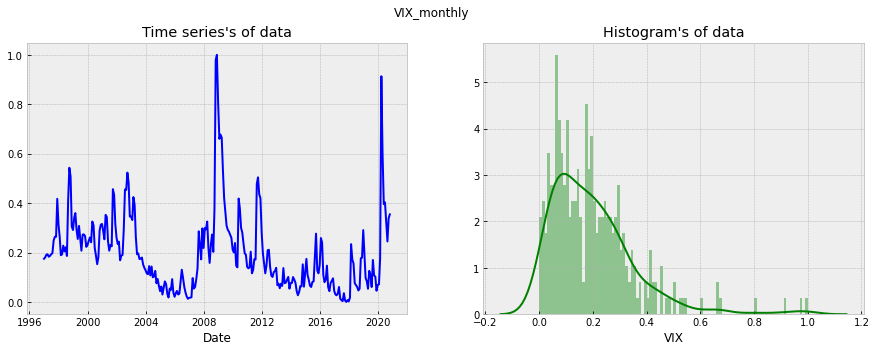

In [7]:
vix_monthly = read_data('VIX_monthly', plot = False)
vix_monthly = vix_monthly[(vix_monthly.index >= datetime(1997, 1, 1)) & (vix_monthly.index <= datetime(2020, 11, 1))]
vix_min, vix_max = vix_monthly.min(), vix_monthly.max()
vix_std = (vix_monthly - vix_min) / (vix_max - vix_min)
create_plot(vix_std, 'VIX_monthly')

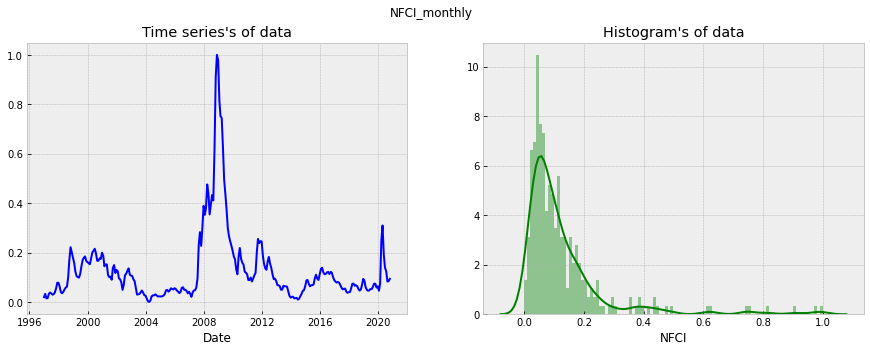

In [8]:
nfci_monthly = read_data('NFCI_monthly', plot = False)
nfci_monthly = nfci_monthly[(nfci_monthly.index >= datetime(1997, 1, 1)) & (nfci_monthly.index <= datetime(2020, 11, 1))]
nfci_min, nfci_max = nfci_monthly.min(), nfci_monthly.max()
nfci_std = (nfci_monthly - nfci_min) / (nfci_max - nfci_min)
create_plot(nfci_std, 'NFCI_monthly')

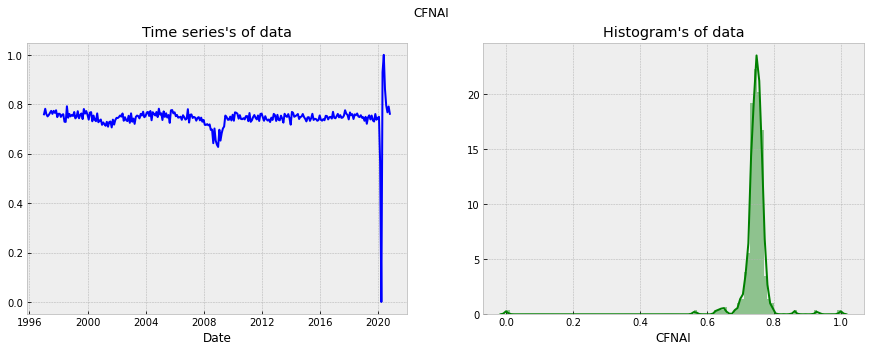

In [9]:
nai = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CFNAI.csv')
nai.set_index(pd.to_datetime(nai.DATE), inplace = True)
nai = nai.iloc[:, 1]
nai = nai[(nai.index >= datetime(1997, 1, 1)) & (nai.index <= datetime(2020, 11, 1))]
nai_min, nai_max = nai.min(), nai.max()
nai_std = (nai - nai_min) / (nai_max - nai_min)
create_plot(nai_std, 'CFNAI')

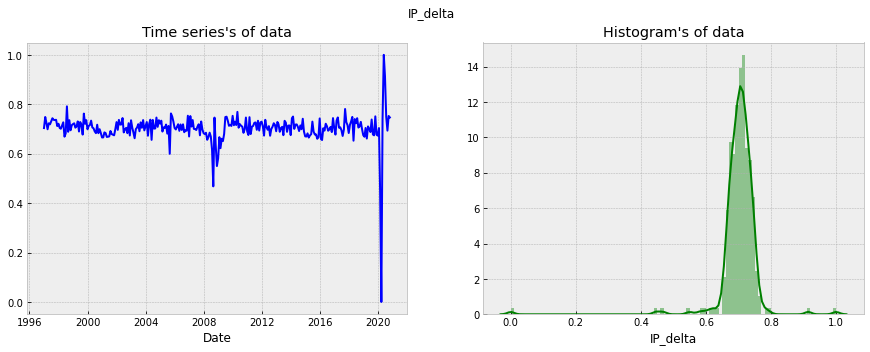

In [10]:
ip = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/INDPRO.csv')
ip.set_index(pd.to_datetime(ip.DATE), inplace = True)
ip['IP_delta'] = ip.INDPRO.diff()
ip = ip.iloc[:, 2]
ip = ip[(ip.index >= datetime(1997, 1, 1)) & (ip.index <= datetime(2020, 11, 1))]
ip_min, ip_max = ip.min(), ip.max()
ip_std = (ip - ip_min) / (ip_max - ip_min)
create_plot(ip_std, 'IP_delta')

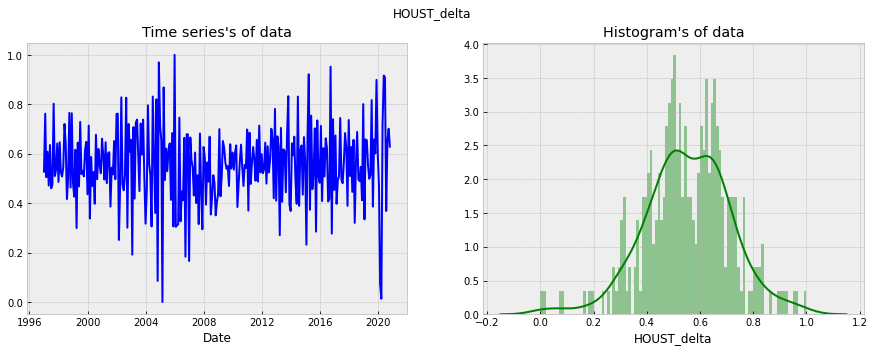

In [11]:
houst = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/HOUST.csv')
houst.set_index(pd.to_datetime(houst.DATE), inplace = True)
houst['HOUST_delta'] = houst.HOUST.diff()
houst = houst.iloc[:, 2]
houst = houst[(houst.index >= datetime(1997, 1, 1)) & (houst.index <= datetime(2020, 11, 1))]
houst_min, houst_max = houst.min(), houst.max()
houst_std = (houst - houst_min) / (houst_max - houst_min)
create_plot(houst_std, 'HOUST_delta')

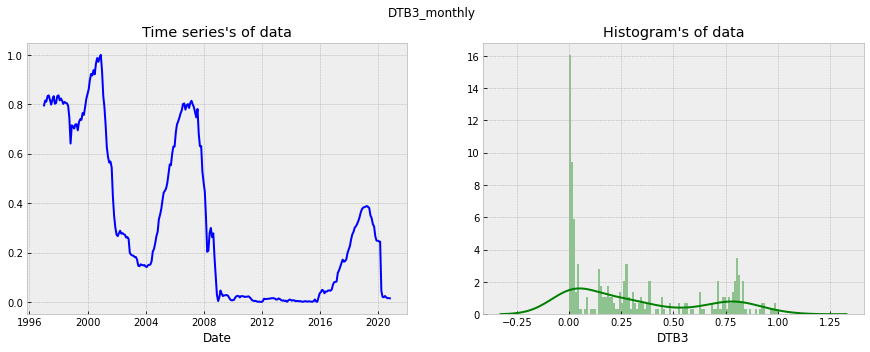

In [12]:
dtb_monthly = read_data('DTB3_monthly', plot = False)
dtb_monthly = dtb_monthly[(dtb_monthly.index >= datetime(1997, 1, 1)) & (dtb_monthly.index <= datetime(2020, 11, 1))]
dtb_min, dtb_max = dtb_monthly.min(), dtb_monthly.max()
dtb_std = (dtb_monthly - dtb_min) / (dtb_max - dtb_min)
create_plot(dtb_std, 'DTB3_monthly')

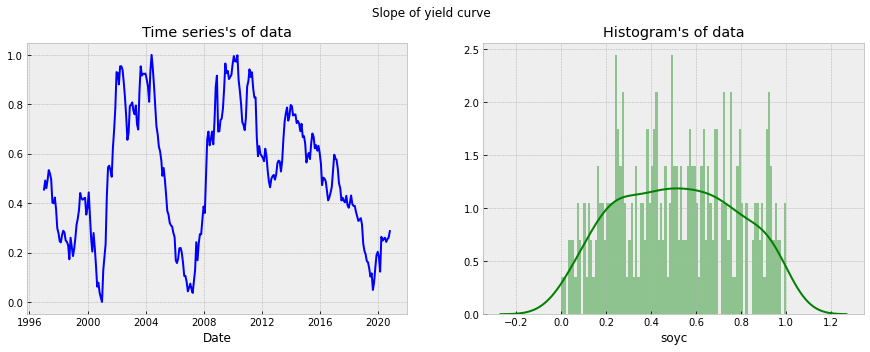

In [14]:
soyc = read_data('soyc_monthly', plot = False)
soyc = soyc[(soyc.index >= datetime(1997, 1, 1)) & (soyc.index <= datetime(2020, 11, 1))]
soyc_min, soyc_max = soyc.min(), soyc.max()
soyc_std = (soyc - soyc_min) / (soyc_max - soyc_min)
create_plot(soyc_std, 'Slope of yield curve')

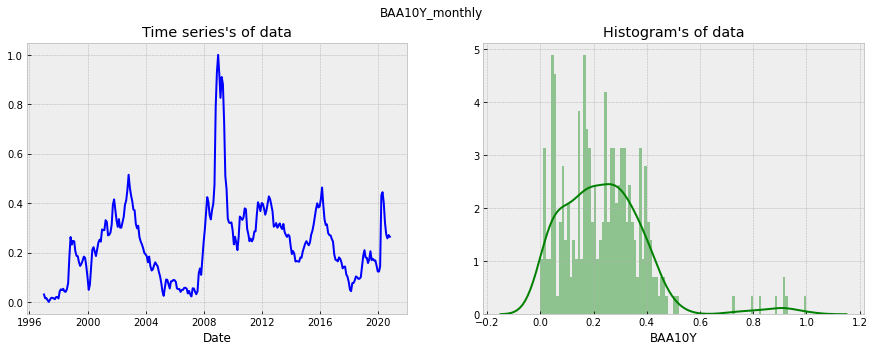

In [15]:
baa_monthly = read_data('BAA10Y_monthly', plot = False)
baa_monthly = baa_monthly[(baa_monthly.index >= datetime(1997, 1, 1)) & (baa_monthly.index <= datetime(2020, 11, 1))]
baa_min, baa_max = baa_monthly.min(), baa_monthly.max()
baa_std = (baa_monthly - baa_min) / (baa_max - baa_min)
create_plot(baa_std, 'BAA10Y_monthly')

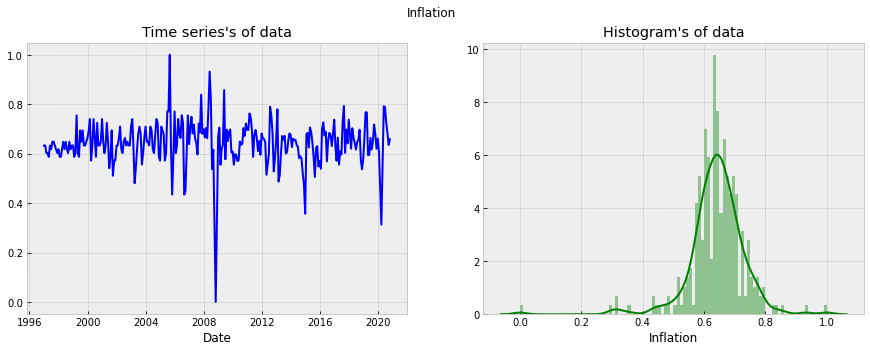

In [16]:
inf = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CPIAUCSL.csv')
inf.set_index(pd.to_datetime(inf.DATE), inplace = True)
inf['Inflation'] = inf.CPIAUCSL.diff()
inf = inf.iloc[1:, 2]
inf = inf[(inf.index >= datetime(1997, 1, 1)) & (inf.index <= datetime(2020, 11, 1))]
inf_min, inf_max = inf.min(), inf.max()
inf_std = (inf - inf_min) / (inf_max - inf_min)
create_plot(inf_std, 'Inflation')

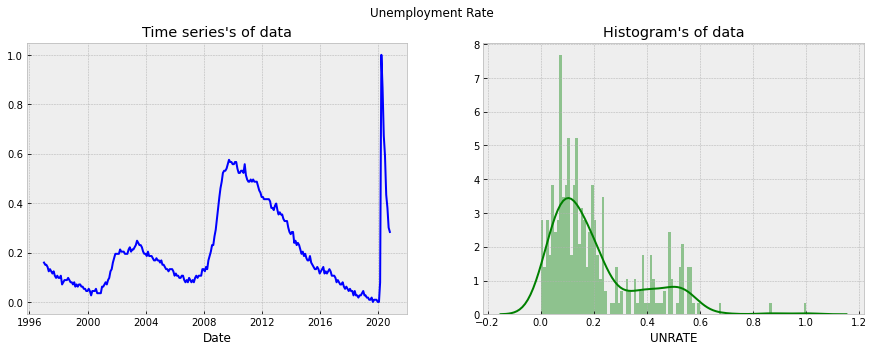

In [17]:
unr = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/UNRATE.csv')
unr.set_index(pd.to_datetime(unr.DATE), inplace = True)
unr = unr.iloc[:, 1]
unr = unr[(unr.index >= datetime(1997, 1, 1)) & (unr.index <= datetime(2020, 11, 1))]
unr_min, unr_max = unr.min(), unr.max()
unr_std = (unr - unr_min) / (unr_max - unr_min)
create_plot(unr_std, 'Unemployment Rate')

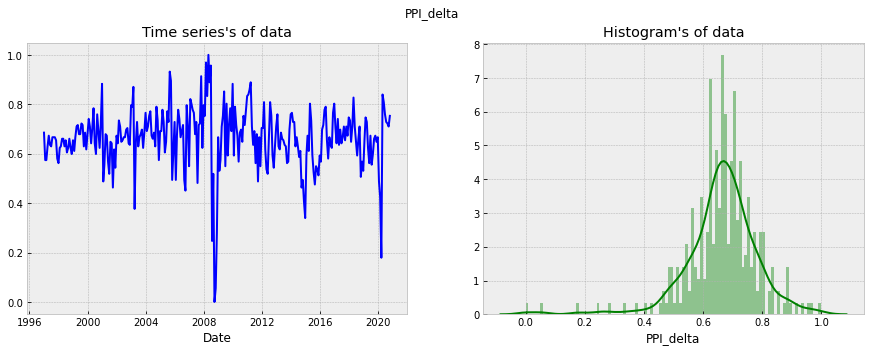

In [18]:
ppi = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/PPIACO.csv')
ppi.set_index(pd.to_datetime(ppi.DATE), inplace = True)
ppi['PPI_delta'] = ppi.PPIACO.diff()
ppi = ppi.iloc[1:, 2]
ppi = ppi[(ppi.index >= datetime(1997, 1, 1)) & (ppi.index <= datetime(2020, 11, 1))]
ppi_min, ppi_max = ppi.min(), ppi.max()
ppi_std = (ppi - ppi_min) / (ppi_max - ppi_min)
create_plot(ppi_std, 'PPI_delta')

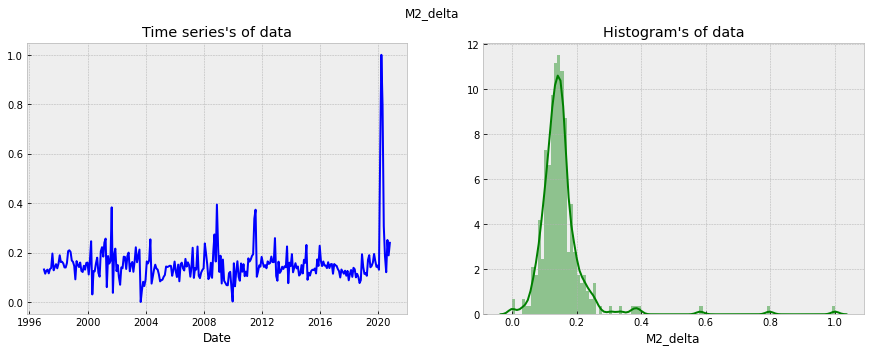

In [19]:
m2sl = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/M2SL.csv')
m2sl.set_index(pd.to_datetime(m2sl.DATE), inplace = True)
m2sl['M2_delta'] = np.log(m2sl.M2SL).diff()
m2sl = m2sl.iloc[1:, 2]
m2sl = m2sl[(m2sl.index >= datetime(1997, 1, 1)) & (m2sl.index <= datetime(2020, 11, 1))]
m2sl_min, m2sl_max = m2sl.min(), m2sl.max()
m2sl_std = (m2sl - m2sl_min) / (m2sl_max - m2sl_min)
create_plot(m2sl_std, 'M2_delta')

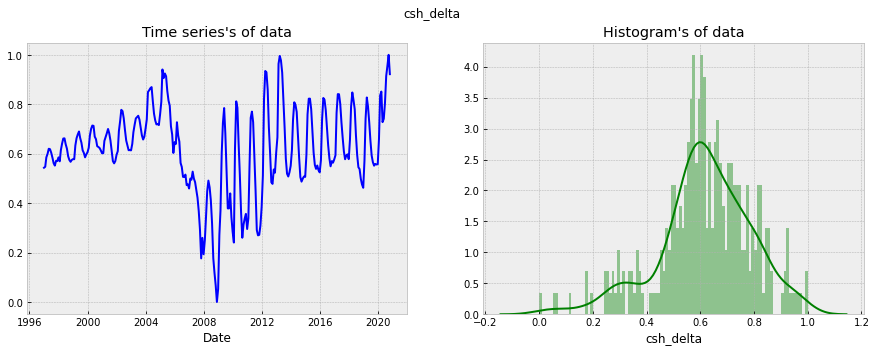

In [20]:
csh = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CSUSHPINSA.csv')
csh.set_index(pd.to_datetime(csh.DATE), inplace = True)
csh['csh_delta'] = csh.CSUSHPINSA.diff()
csh = csh.iloc[1:, 2]
csh = csh[(csh.index >= datetime(1997, 1, 1)) & (csh.index <= datetime(2020, 11, 1))]
csh_min, csh_max = csh.min(), csh.max()
csh_std = (csh - csh_min) / (csh_max - csh_min)
create_plot(csh_std, 'csh_delta')

In [21]:
data = pd.concat([vix_std, nfci_std, nai_std, ip_std, houst_std, dtb_std, soyc_std, baa_std, inf_std, unr_std, ppi_std, m2sl_std, csh_std], axis = 1)

In [47]:
data

,VIX,NFCI,CFNAI,IP_delta,HOUST_delta,DTB3,soyc,BAA10Y,Inflation,UNRATE,PPI_delta,M2_delta,csh_delta
1997-01-01,0.174745,0.019374,0.759392,0.703762,0.527331,0.795316,0.454905,0.030121,0.633140,0.159292,0.685185,0.131356,0.543170
1997-02-01,0.180529,0.032841,0.781764,0.748648,0.762058,0.815259,0.491349,0.014679,0.633140,0.150442,0.574074,0.114382,0.547130
1997-03-01,0.191184,0.014855,0.760236,0.726292,0.504823,0.810710,0.460179,0.015609,0.602568,0.150442,0.574074,0.126645,0.585046
1997-04-01,0.192991,0.014942,0.750950,0.698819,0.607717,0.833145,0.492596,0.007328,0.602568,0.141593,0.629630,0.130667,0.599360
1997-05-01,0.182950,0.031728,0.756437,0.722881,0.471061,0.836111,0.533511,0.000000,0.587282,0.123894,0.672840,0.115805,0.619918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,0.402741,0.139078,0.861967,0.913991,0.908360,0.024043,0.260062,0.320762,0.789361,0.592920,0.759259,0.184952,0.805086
2020-08-01,0.321353,0.123777,0.795272,0.749396,0.368167,0.018731,0.242938,0.273412,0.725925,0.433628,0.728395,0.120404,0.914421
2020-09-01,0.244860,0.082421,0.767412,0.693303,0.654341,0.015073,0.254523,0.257370,0.684806,0.380531,0.722222,0.250687,0.955992
2020-10-01,0.338842,0.084112,0.791051,0.752644,0.700965,0.015769,0.260503,0.270593,0.635127,0.300885,0.709877,0.188579,1.000000


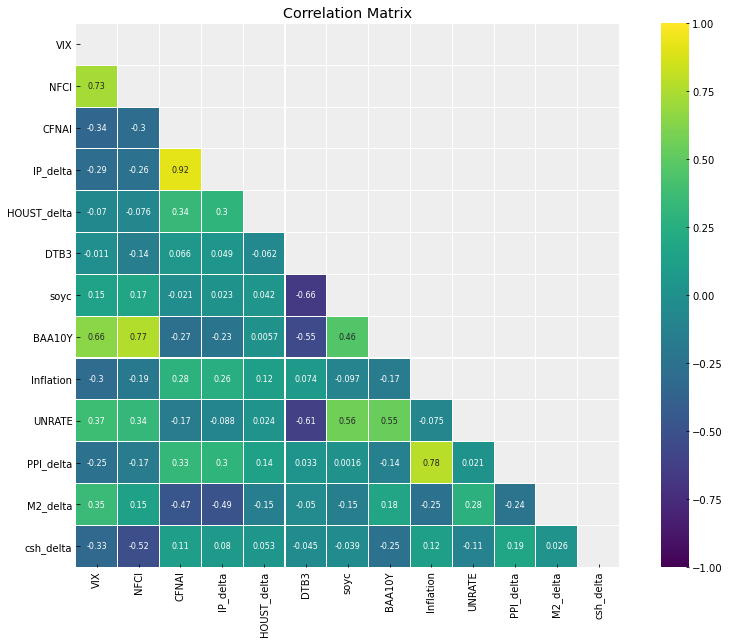

In [23]:
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(data.corr(), 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True, mask = np.triu(data.corr()))
ax.set_title('Correlation Matrix')
plt.show()

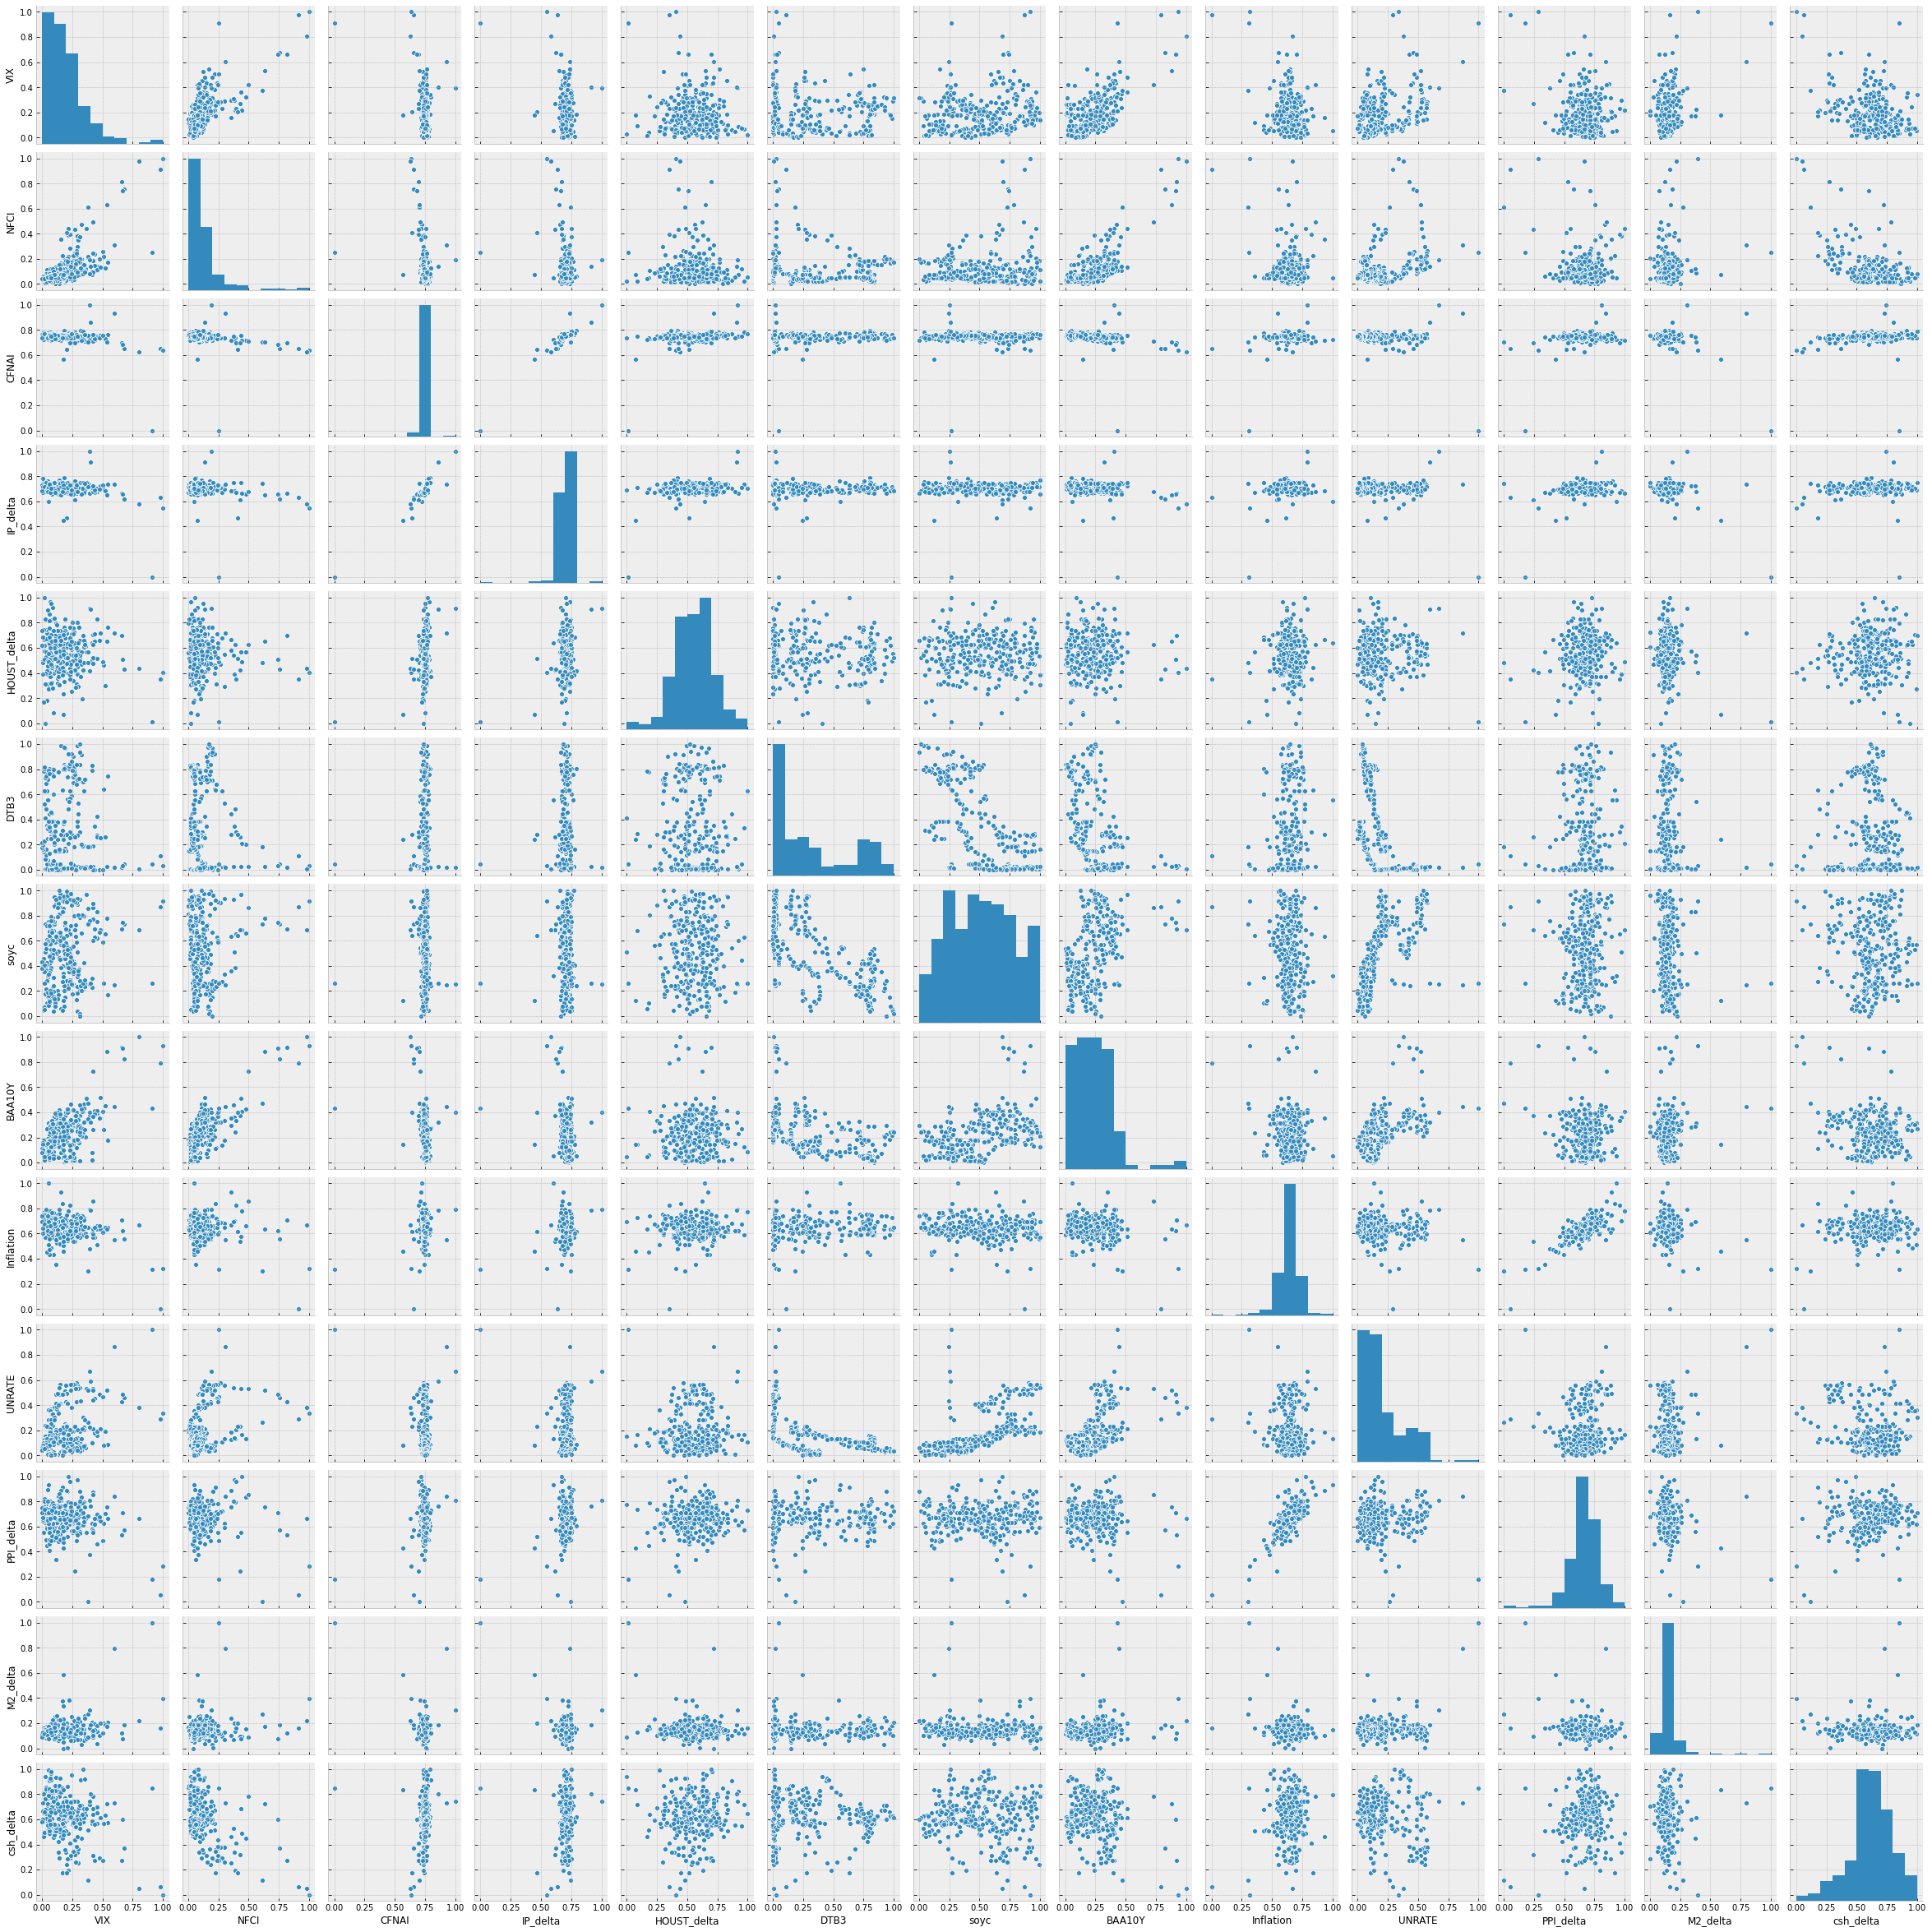

In [24]:
sns.pairplot(data)
plt.show()

In [25]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
VIX,287.0,0.197625,0.158655,0.0,0.079224,0.173531,0.268788,1.0
NFCI,287.0,0.127383,0.147484,0.0,0.047439,0.084641,0.151892,1.0
CFNAI,287.0,0.744081,0.054039,0.0,0.736387,0.747995,0.758970,1.0
IP_delta,287.0,0.702410,0.059387,0.0,0.684928,0.705357,0.726369,1.0
HOUST_delta,287.0,0.552612,0.160346,0.0,0.458199,0.546624,0.655949,1.0
DTB3,287.0,0.322811,0.320275,0.0,0.019783,0.227564,0.636162,1.0
soyc,287.0,0.514777,0.262420,0.0,0.279884,0.508564,0.725898,1.0
BAA10Y,287.0,0.236444,0.164188,0.0,0.122473,0.229301,0.320064,1.0
Inflation,287.0,0.641516,0.090824,0.0,0.602568,0.646897,0.686946,1.0
UNRATE,287.0,0.203972,0.169897,0.0,0.079646,0.141593,0.278761,1.0
